In [1]:
def is_colab():
    try:
        import google.colab
        return True
    except:
        return False

if is_colab():
    !pip install dask[complete]

In [2]:
import gdown
import os

if not os.path.exists("dataset"): # download the dataset if it doesn't exist
    os.makedirs("dataset", exist_ok=True)

    output = "dataset/road_aci_ds.zip"

    url = "https://drive.google.com/file/d/1edKrdWNOcgbAo2JtckX-PEyM0FdEq4EG/view?usp=drive_link"
    gdown.download(url=url, output=output, fuzzy=True)

    from zipfile import ZipFile
    with ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall("dataset/")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [4]:
df = dd.read_csv("./dataset/US_Accidents_March23.csv")

In [5]:
df = df.drop(["Source", "ID"], axis=1).compute() # Drop columns

In [6]:
df['Start_Time'] = dd.to_datetime(df['Start_Time'], format='mixed')
df['End_Time'] = dd.to_datetime(df['End_Time'], format='mixed')

In [7]:
# row and columns (r,c)
df.shape

(7728394, 44)

In [8]:
df[df["Start_Time"].isnull() | df["End_Time"].isnull()] # checking if there are any null values in the datetime columns

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [9]:
df.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2018-03-12 18:12:23,2018-03-13 00:12:23,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2021-10-10 13:38:00,2021-10-10 15:19:30,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,2020-04-23 06:07:43,2020-04-23 06:36:37,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,2017-09-13 17:07:28,2017-09-13 17:37:04,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,2,2022-03-03 11:41:00,2022-03-03 14:41:00,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
5,3,2021-12-26 10:25:48,2021-12-26 11:44:55,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
6,2,2022-02-18 16:40:05,2022-02-18 17:09:42,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,...,False,False,False,False,False,False,Day,Day,Day,Day
7,3,2022-04-02 18:10:00,2022-04-02 20:25:33,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,...,False,False,False,False,False,False,Day,Day,Day,Day
8,2,2022-07-31 13:09:30,2022-07-31 15:40:00,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,2020-02-07 13:52:22,2020-02-07 16:03:52,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, 0 to 173289
Data columns (total 44 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               int64         
 1   Start_Time             datetime64[ns]
 2   End_Time               datetime64[ns]
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   End_Lat                float64       
 6   End_Lng                float64       
 7   Distance(mi)           float64       
 8   Description            string        
 9   Street                 string        
 10  City                   string        
 11  County                 string        
 12  State                  string        
 13  Zipcode                string        
 14  Country                string        
 15  Timezone               string        
 16  Airport_Code           string        
 17  Weather_Timestamp      string        
 18  Temperature(F)         float

In [11]:
#checking for outliers
df.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7728394,7728394,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,2020-06-04 04:23:22.765651968,2020-06-04 11:47:48.023094528,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
min,1.000000e+00,2016-01-14 20:18:33,2016-02-08 06:37:08,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2018-11-23 04:01:12.249999872,2018-11-23 05:45:20.500000,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,2020-11-11 08:40:22,2020-11-11 15:56:29,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,2022-01-20 07:30:08.500000,2022-01-20 17:44:40,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,2023-03-31 23:30:00,2023-03-31 23:59:00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01
std,4.875313e-01,NaN,NaN,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01


In [12]:
# printing all the columns and there missing values
for col in df.columns:
    missing = df[col].isnull().sum()
    percent_missing = missing / len(df) * 100
    print(f"{col} - {missing} missing values ({percent_missing:.2f}%)")


Severity - 0 missing values (0.00%)
Start_Time - 0 missing values (0.00%)
End_Time - 0 missing values (0.00%)
Start_Lat - 0 missing values (0.00%)
Start_Lng - 0 missing values (0.00%)
End_Lat - 3402762 missing values (44.03%)
End_Lng - 3402762 missing values (44.03%)
Distance(mi) - 0 missing values (0.00%)
Description - 5 missing values (0.00%)
Street - 10869 missing values (0.14%)
City - 253 missing values (0.00%)
County - 0 missing values (0.00%)
State - 0 missing values (0.00%)
Zipcode - 1915 missing values (0.02%)
Country - 0 missing values (0.00%)
Timezone - 7808 missing values (0.10%)
Airport_Code - 22635 missing values (0.29%)
Weather_Timestamp - 120228 missing values (1.56%)
Temperature(F) - 163853 missing values (2.12%)
Wind_Chill(F) - 1999019 missing values (25.87%)
Humidity(%) - 174144 missing values (2.25%)
Pressure(in) - 140679 missing values (1.82%)
Visibility(mi) - 177098 missing values (2.29%)
Wind_Direction - 175206 missing values (2.27%)
Wind_Speed(mph) - 571233 missi

In [13]:
# End_lat and End_lng have missing values, copying the start_lat and start_lng to the end_lat and end_lng
df["End_Lat"] = df["End_Lat"].fillna(df["Start_Lat"])
df["End_Lng"] = df["End_Lng"].fillna(df["Start_Lng"])

In [14]:
df["End_Lat"].isnull().sum(), df["End_Lng"].isnull().sum() # checking if there are any missing values in the end_lat and end_lng

(np.int64(0), np.int64(0))

<Axes: xlabel='City'>

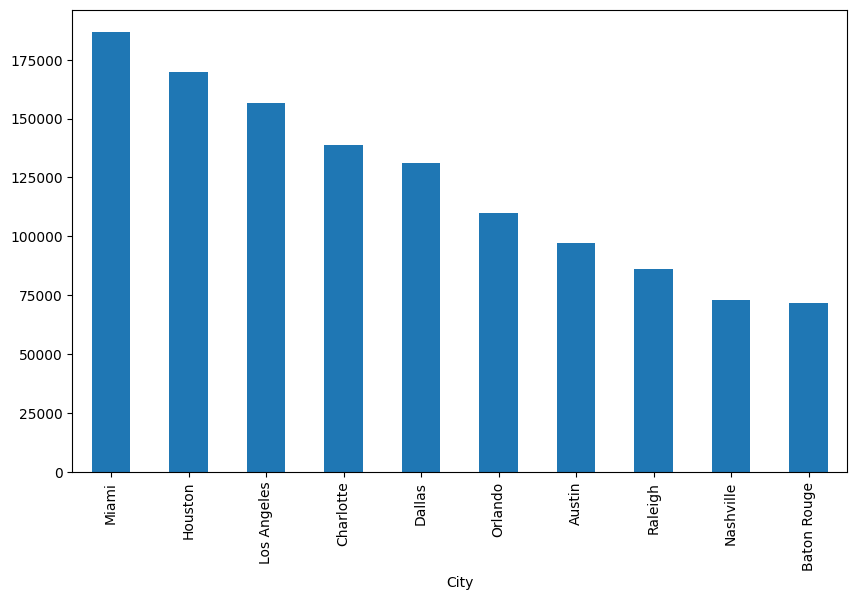

In [15]:
df['City'].value_counts()[:10].plot(kind='bar', figsize=(10, 6)) # top 10 cities with most accidents

<Axes: xlabel='State'>

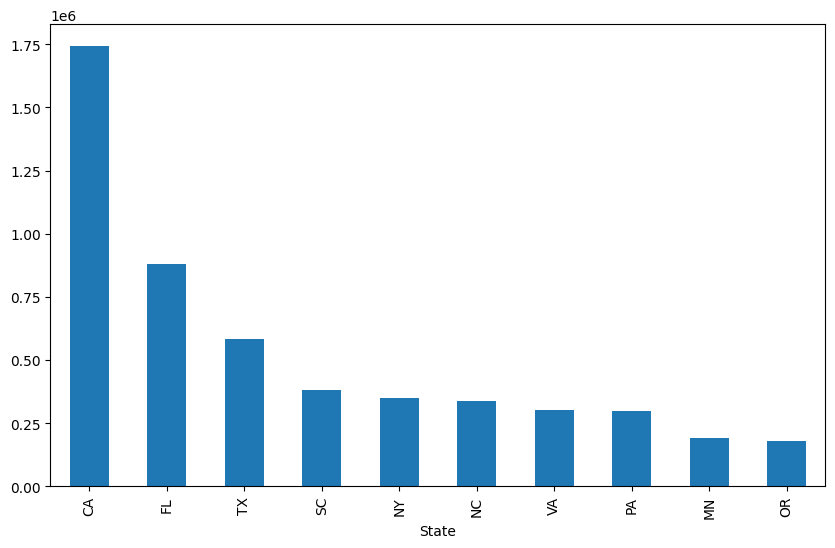

In [16]:
#states with most accidents - We have state codes, top 10 states with most accidents
df['State'].value_counts()[:10].plot(kind='bar', figsize=(10, 6))

<Axes: xlabel='State'>

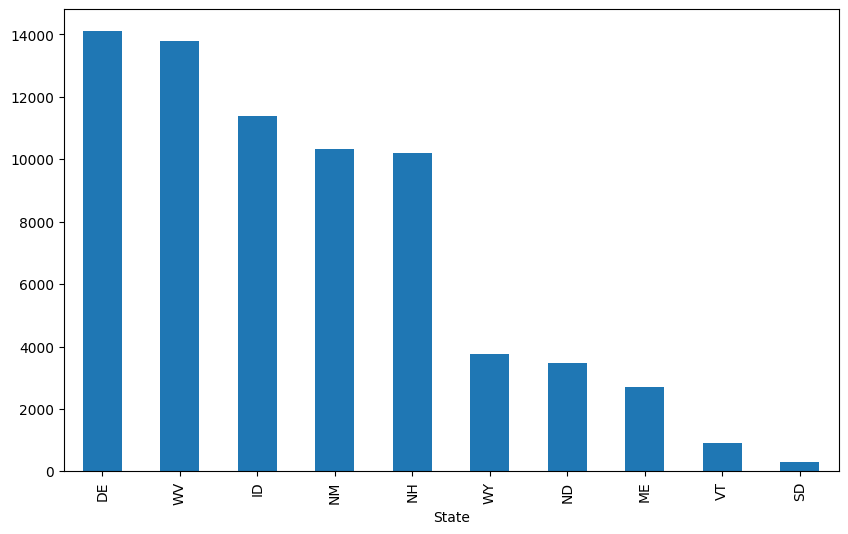

In [17]:
#State with least accidents
df['State'].value_counts().tail(10).plot(kind='bar', figsize=(10, 6))

<Axes: xlabel='Severity', ylabel='Count'>

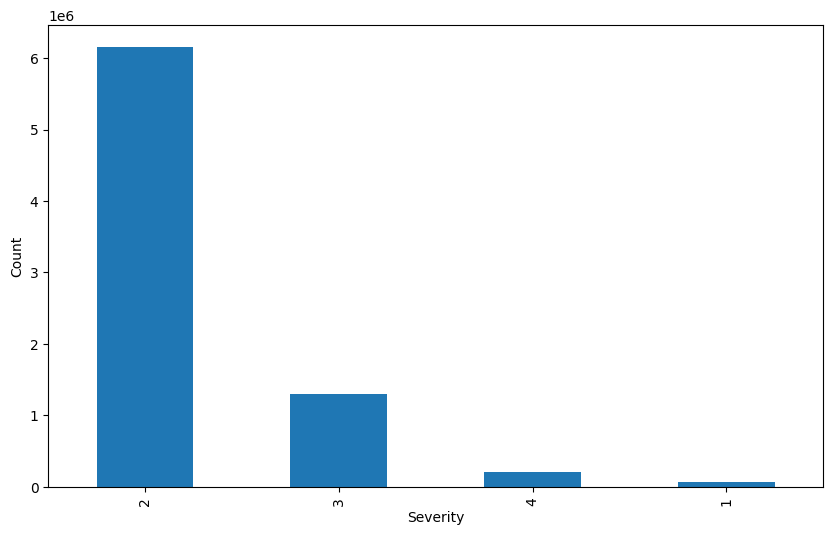

In [18]:
# Severity of accidents, count in 
df['Severity'].value_counts().plot(kind='bar', figsize=(10, 6), xlabel="Severity", ylabel="Count")

In [19]:
# since start_time shows the time of the accident, and end_time shows the impact of the accident on the traffic
# we will calc duration of traffic impact
# pd.DataFrame(df['End_Time'] - df['Start_Time']).value_counts().plot(kind='bar', figsize=(10, 6))

# ploting with seaborn for End_Time - Start_Time
df_acc_duration = pd.DataFrame(df['End_Time'] - df['Start_Time'])

<Axes: xlabel='0'>

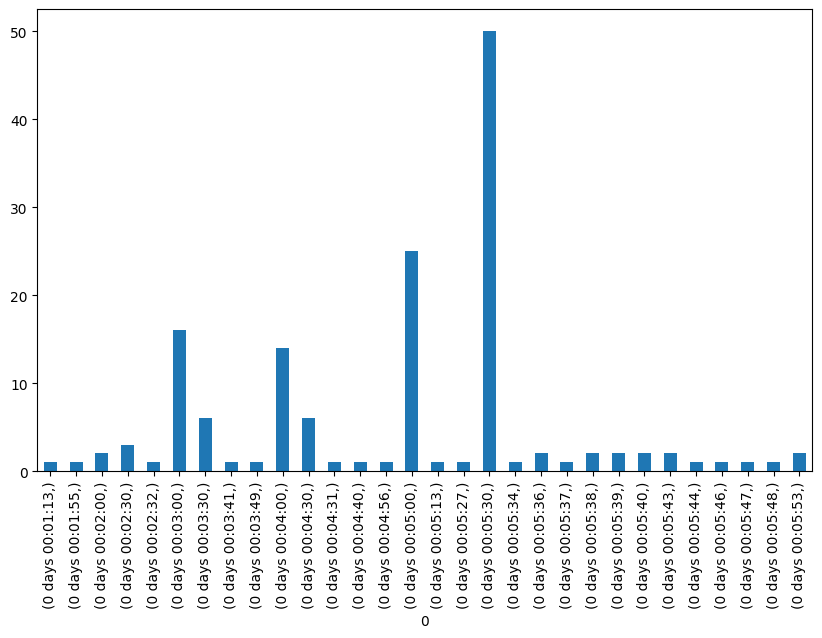

In [20]:
df_acc_duration.value_counts().sort_index()[:30].plot(kind='bar', figsize=(10, 6))

<Axes: xlabel='Start_Time'>

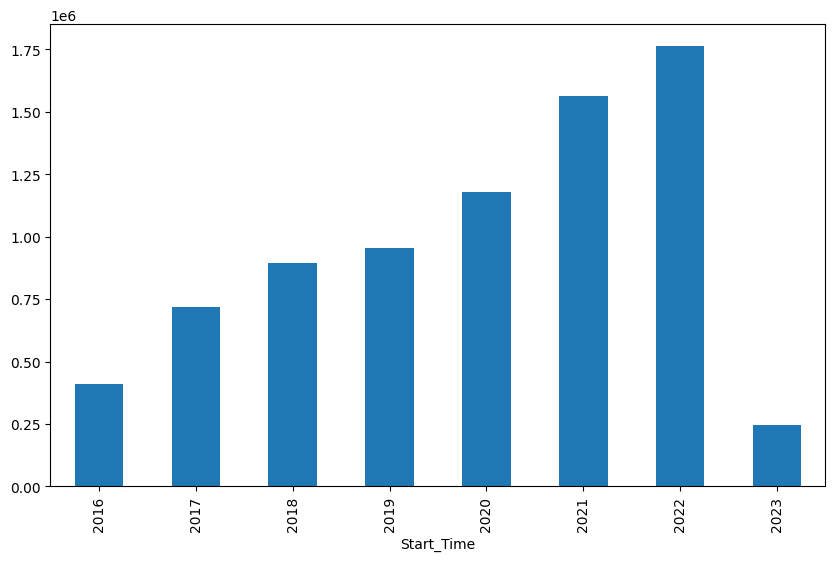

In [21]:
# Yearly accidents top 10
year_acc = df['Start_Time'].dt.year
year_acc.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

<Axes: xlabel='Start_Time'>

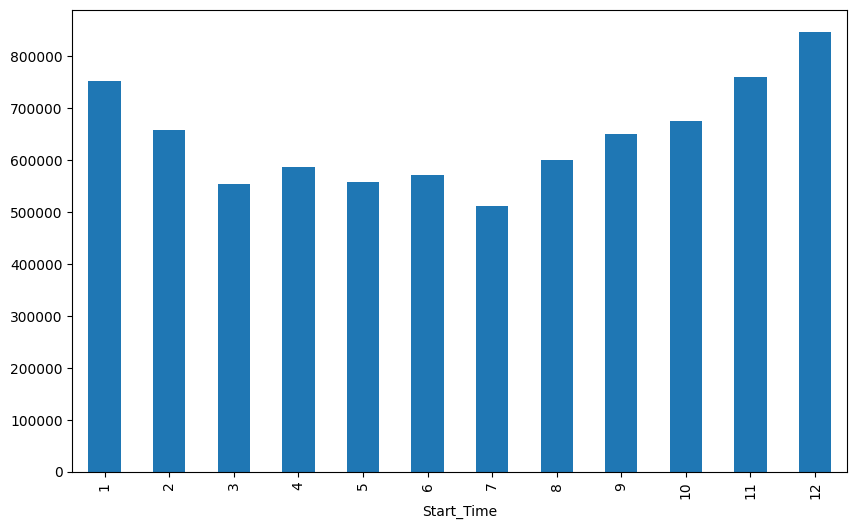

In [22]:
# Monthly accidents overall
df['Start_Time'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

<Axes: xlabel='Start_Time'>

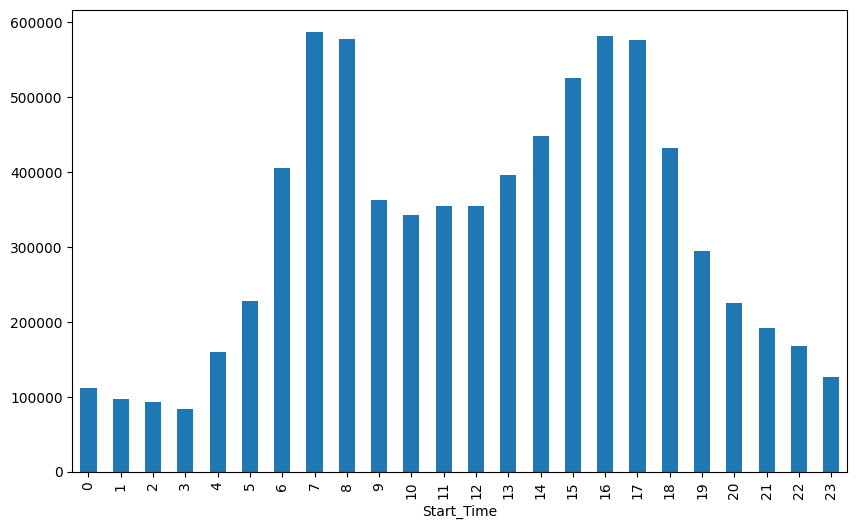

In [23]:
# Hourly accidents overall
df['Start_Time'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

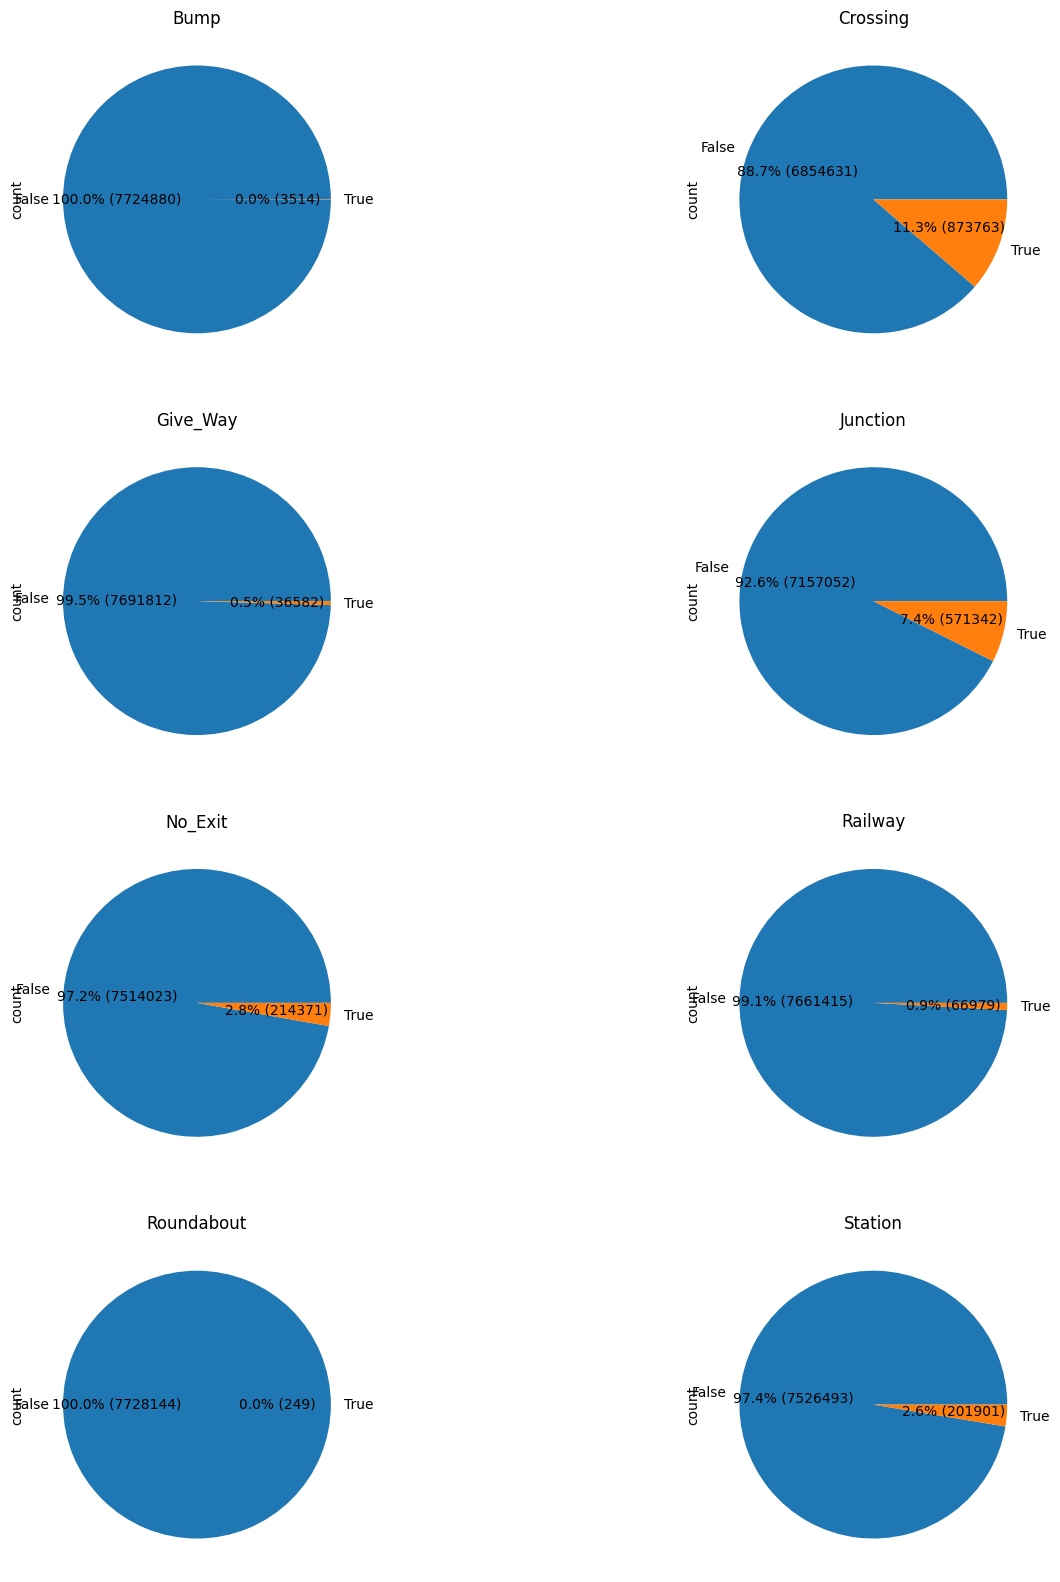

In [24]:
# road conditions true and false
fig, ax = plt.subplots(4, 2, figsize=(16, 20))

ax[0, 0].set_title("Bump")
df['Bump'].value_counts().plot(kind='pie', ax=ax[0, 0], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['Bump'].value_counts()) / 100))

ax[0, 1].set_title("Crossing")
df['Crossing'].value_counts().plot(kind='pie', ax=ax[0, 1], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['Bump'].value_counts()) / 100))

ax[1, 0].set_title("Give_Way")
df['Give_Way'].value_counts().plot(kind='pie', ax=ax[1, 0], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['Bump'].value_counts()) / 100))

ax[1, 1].set_title("Junction")
df['Junction'].value_counts().plot(kind='pie', ax=ax[1, 1], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['Bump'].value_counts()) / 100))

ax[2, 0].set_title("No_Exit")
df['Stop'].value_counts().plot(kind='pie', ax=ax[2, 0], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['No_Exit'].value_counts()) / 100))

ax[2, 1].set_title("Railway")
df['Railway'].value_counts().plot(kind='pie', ax=ax[2, 1], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['Railway'].value_counts()) / 100))

ax[3, 0].set_title("Roundabout")
df['Roundabout'].value_counts().plot(kind='pie', ax=ax[3, 0], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['Roundabout'].value_counts()) / 100))

ax[3, 1].set_title("Station")
df['Station'].value_counts().plot(kind='pie', ax=ax[3, 1], autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(df['Station'].value_counts()) / 100))

plt.show()

<Axes: xlabel='Temperature(F)', ylabel='Count'>

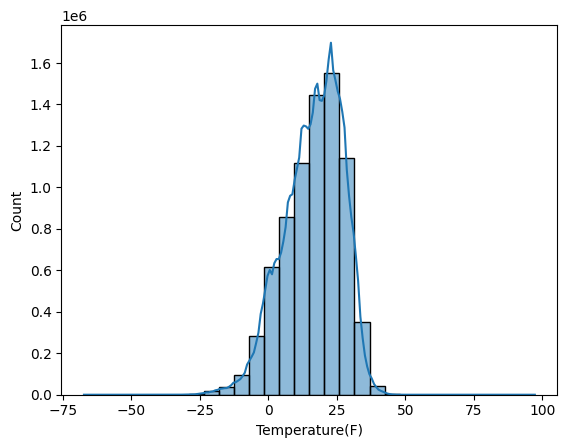

In [25]:
# affetced by weather in celcius, in the setp of 30 at each bar
def fahrenheit_to_celsius(f):
    return (f - 32) * 5.0/9.0

TempsInCels = df['Temperature(F)'].apply(fahrenheit_to_celsius)
# TempsInCels.plot(kind='hist', bins=30, figsize=(10, 6), xlabel="Temperature (Celsius)", ylabel="Count")
sns.histplot(TempsInCels, bins=30, kde=True)

In [26]:
# wheter cond aggregated
df['Weather_Condition'].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64[pyarrow]

<Axes: xlabel='Weather_Condition'>

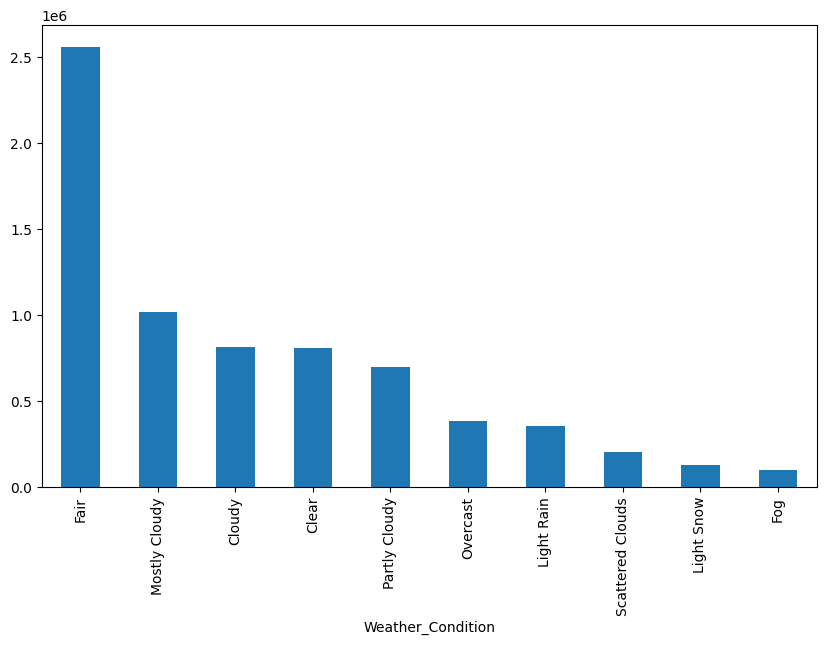

In [27]:
# whetahr conditions
df['Weather_Condition'].value_counts()[:10].plot(kind='bar', figsize=(10, 6))

In [28]:
# missing value count
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df["per_missing"] = missing_df["missing_count"] / len(df) * 100
missing_df[missing_df["per_missing"] > 25] # missing values > 25%

,columns_name,missing_count,per_missing
19,Wind_Chill(F),1999019,25.865904
25,Precipitation(in),2203586,28.512858


In [29]:
col_rem_list = missing_df[missing_df["per_missing"] > 25]["columns_name"].tolist()
col_rem_list

['Wind_Chill(F)', 'Precipitation(in)']

In [30]:
df = df.drop(col_rem_list, axis=1)

In [31]:
# Nautical_Twilight, Astronomical_Twilight, Civil_Twilight not needed
df = df.drop(["Nautical_Twilight", "Astronomical_Twilight", "Civil_Twilight"], axis=1)

In [32]:
# removing accident descriptions
df = df.drop(["Description"], axis=1)

In [33]:
df.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,2018-03-12 18:12:23,2018-03-13 00:12:23,39.865147,-84.058723,39.865147,-84.058723,0.01,I-70 E,Dayton,...,False,False,False,False,False,False,False,False,False,Night
1,2,2021-10-10 13:38:00,2021-10-10 15:19:30,39.928059,-82.831184,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,...,False,False,False,False,False,False,False,False,False,Night
2,2,2020-04-23 06:07:43,2020-04-23 06:36:37,39.063148,-84.032608,39.063148,-84.032608,0.01,State Route 32,Williamsburg,...,False,False,False,False,False,False,False,True,False,Night
3,3,2017-09-13 17:07:28,2017-09-13 17:37:04,39.747753,-84.205582,39.747753,-84.205582,0.01,I-75 S,Dayton,...,False,False,False,False,False,False,False,False,False,Night
4,2,2022-03-03 11:41:00,2022-03-03 14:41:00,39.627781,-84.188354,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,...,False,False,False,False,False,False,False,True,False,Day
5,3,2021-12-26 10:25:48,2021-12-26 11:44:55,40.100590,-82.925194,40.100590,-82.925194,0.01,Westerville Rd,Westerville,...,False,False,False,False,False,False,False,False,False,Day
6,2,2022-02-18 16:40:05,2022-02-18 17:09:42,39.758274,-84.230507,39.758274,-84.230507,0.00,N Woodward Ave,Dayton,...,False,False,False,False,False,False,False,False,False,Day
7,3,2022-04-02 18:10:00,2022-04-02 20:25:33,39.770382,-84.194901,39.770382,-84.194901,0.01,N Main St,Dayton,...,False,False,False,False,False,False,False,False,False,Day
8,2,2022-07-31 13:09:30,2022-07-31 15:40:00,39.778061,-84.172005,39.778061,-84.172005,0.00,Notre Dame Ave,Dayton,...,False,False,False,False,False,False,False,False,False,Day
9,3,2020-02-07 13:52:22,2020-02-07 16:03:52,40.100590,-82.925194,40.100590,-82.925194,0.01,Westerville Rd,Westerville,...,False,False,False,False,False,False,False,False,False,Day


In [34]:
# Extract year, month, day, hour and weekday
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday

# Time Duration of accidents
df["Time_Duration(min)"] = round((df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 60, 2)

In [35]:
feature_list = [
    "Severity", "Start_Lat", "Start_Lng", "Distance(mi)", "City", "County", "State", "Timezone",
    "Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Direction", "Weather_Condition",
    "Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", 'Roundabout','Station','Stop',
    'Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)'
]

In [36]:
df = df[feature_list]

In [37]:
df.head(10)

,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Temperature(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Hour,Weekday,Time_Duration(min)
0,3,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,US/Eastern,36.9,91.0,...,False,False,False,False,False,False,Night,18,0,360.00
1,2,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,US/Eastern,37.9,100.0,...,False,False,False,False,False,False,Night,13,6,101.50
2,2,39.063148,-84.032608,0.01,Williamsburg,Clermont,OH,US/Eastern,36.0,100.0,...,False,False,False,False,True,False,Night,6,3,28.90
3,3,39.747753,-84.205582,0.01,Dayton,Montgomery,OH,US/Eastern,35.1,96.0,...,False,False,False,False,False,False,Night,17,2,29.60
4,2,39.627781,-84.188354,0.01,Dayton,Montgomery,OH,US/Eastern,36.0,89.0,...,False,False,False,False,True,False,Day,11,3,180.00
5,3,40.100590,-82.925194,0.01,Westerville,Franklin,OH,US/Eastern,37.9,97.0,...,False,False,False,False,False,False,Day,10,6,79.12
6,2,39.758274,-84.230507,0.00,Dayton,Montgomery,OH,US/Eastern,34.0,100.0,...,False,False,False,False,False,False,Day,16,4,29.62
7,3,39.770382,-84.194901,0.01,Dayton,Montgomery,OH,US/Eastern,34.0,100.0,...,False,False,False,False,False,False,Day,18,5,135.55
8,2,39.778061,-84.172005,0.00,Dayton,Montgomery,OH,US/Eastern,33.3,99.0,...,False,False,False,False,False,False,Day,13,6,150.50
9,3,40.100590,-82.925194,0.01,Westerville,Franklin,OH,US/Eastern,37.4,100.0,...,False,False,False,False,False,False,Day,13,4,131.50


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, 0 to 173289
Data columns (total 31 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Severity            int64  
 1   Start_Lat           float64
 2   Start_Lng           float64
 3   Distance(mi)        float64
 4   City                string 
 5   County              string 
 6   State               string 
 7   Timezone            string 
 8   Temperature(F)      float64
 9   Humidity(%)         float64
 10  Pressure(in)        float64
 11  Visibility(mi)      float64
 12  Wind_Direction      string 
 13  Weather_Condition   string 
 14  Amenity             bool   
 15  Bump                bool   
 16  Crossing            bool   
 17  Give_Way            bool   
 18  Junction            bool   
 19  No_Exit             bool   
 20  Railway             bool   
 21  Roundabout          bool   
 22  Station             bool   
 23  Stop                bool   
 24  Traffic_Calming     bool   
 2

In [39]:
# convert the boolean columns to integer (0 or 1)
for col in df.columns:
    if df[col].dtype == 'bool' or df[col].dtype == 'int32' or df[col].dtype == 'int64':
        df[col] = df[col].astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, 0 to 173289
Data columns (total 31 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Severity            float64
 1   Start_Lat           float64
 2   Start_Lng           float64
 3   Distance(mi)        float64
 4   City                string 
 5   County              string 
 6   State               string 
 7   Timezone            string 
 8   Temperature(F)      float64
 9   Humidity(%)         float64
 10  Pressure(in)        float64
 11  Visibility(mi)      float64
 12  Wind_Direction      string 
 13  Weather_Condition   string 
 14  Amenity             float64
 15  Bump                float64
 16  Crossing            float64
 17  Give_Way            float64
 18  Junction            float64
 19  No_Exit             float64
 20  Railway             float64
 21  Roundabout          float64
 22  Station             float64
 23  Stop                float64
 24  Traffic_Calming     float64
 2

In [41]:
df.iloc[2]

Severity                       2.0
Start_Lat                39.063148
Start_Lng               -84.032608
Distance(mi)                  0.01
City                  Williamsburg
County                    Clermont
State                           OH
Timezone                US/Eastern
Temperature(F)                36.0
Humidity(%)                  100.0
Pressure(in)                 29.67
Visibility(mi)                10.0
Wind_Direction                  SW
Weather_Condition         Overcast
Amenity                        0.0
Bump                           0.0
Crossing                       0.0
Give_Way                       0.0
Junction                       0.0
No_Exit                        0.0
Railway                        0.0
Roundabout                     0.0
Station                        0.0
Stop                           0.0
Traffic_Calming                0.0
Traffic_Signal                 1.0
Turning_Loop                   0.0
Sunrise_Sunset               Night
Hour                

/home/infinity/Desktop/texhstarx assignment/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/infinity/Desktop/texhstarx assignment/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


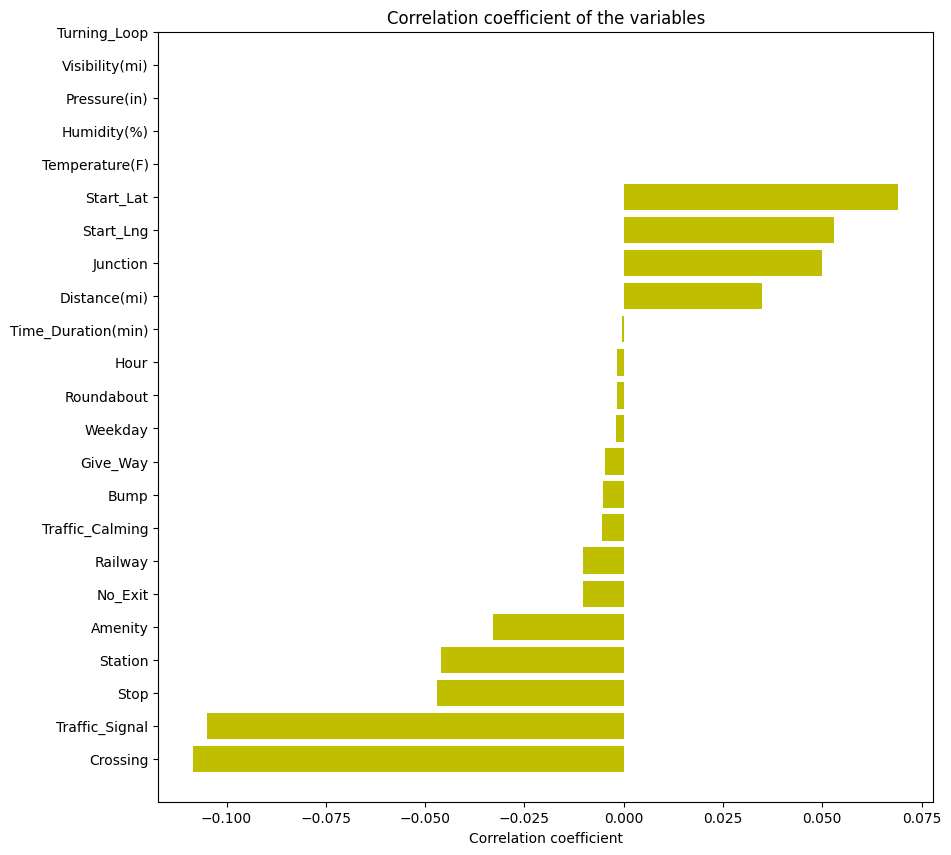

In [42]:
# Corelation matrix with seaborn, sevrity is the target and only numerical columns
import numpy as np
# all the numerical columns
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.Severity.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [43]:
# no correlation with severity

zero_coef_cols = ['Turning_Loop','Visibility(mi)','Pressure(in)','Humidity(%)','Temperature(F)']
for col in zero_coef_cols:
    print(col,len(df[col].unique()))

Turning_Loop 1
Visibility(mi) 93
Pressure(in) 1145
Humidity(%) 101
Temperature(F) 861


In [44]:
# droping the columns with no correlation
df = df.drop(zero_coef_cols, axis=1)

In [45]:
# high correlation with severity
high_corr = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
high_corr

,col_labels,corr_values
9,Crossing,-0.108323
18,Traffic_Signal,-0.104901
1,Start_Lng,0.052862
0,Start_Lat,0.069060


<Axes: >

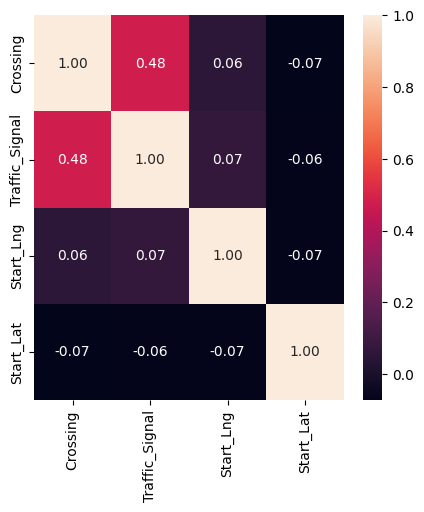

In [46]:
# heatmap of high correlation
high_corr_df = df[high_corr.col_labels.to_list()]
plt.figure(figsize=(5, 5))
sns.heatmap(high_corr_df.corr(), annot=True, fmt=".2f")

In [47]:
# all string columns
df.select_dtypes(include=['object', 'string']).columns

Index(['City', 'County', 'State', 'Timezone', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [48]:
for col in df.select_dtypes(include=['object', 'string']).columns:
    print(col, len(df[col].unique()))

City 13679
County 1871
State 49
Timezone 5
Wind_Direction 25
Weather_Condition 145
Sunrise_Sunset 3


In [49]:
#removing the columns with high cardinality
df = df.drop(['City', 'County', 'State', "Timezone"], axis=1)

In [53]:
# converting the String type to Object type
for col in df.select_dtypes(include=['object', 'string']).columns:
    df[col] = df[col].astype('object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, 0 to 173289
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Severity            float64
 1   Start_Lat           float64
 2   Start_Lng           float64
 3   Distance(mi)        float64
 4   Wind_Direction      object 
 5   Weather_Condition   object 
 6   Amenity             float64
 7   Bump                float64
 8   Crossing            float64
 9   Give_Way            float64
 10  Junction            float64
 11  No_Exit             float64
 12  Railway             float64
 13  Roundabout          float64
 14  Station             float64
 15  Stop                float64
 16  Traffic_Calming     float64
 17  Traffic_Signal      float64
 18  Sunrise_Sunset      object 
 19  Hour                float64
 20  Weekday             float64
 21  Time_Duration(min)  float64
dtypes: float64(19), object(3)
memory usage: 1.4+ GB


In [60]:
# dealing of missing values
df.dropna(subset=df.columns[df.isnull().mean() != 0], axis=0, inplace=True)
df.shape

(7494396, 22)

In [61]:
# Exporting the cleaned data
df.to_csv("dataset/cleaned_accidents.csv", index=False)